<div>
<img src="OGtip.jpg" alt="Oeson Learning" style="width: 235px; height: 150px;"/>
</div>

In [5]:
#import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import datetime

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [ ]:
#pip install "plotly>=5" "ipywidgets>=7.6"


In [7]:
#import dataset

df = pd.read_csv("salaries.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


#### Perform Exploratory Data Analysis on the Given Dataset

This exercise involves examining a dataset of various data-related jobs posted during the year 2023.  Specifically, I'll be attempting to extract meaningful insights to explain the given salary-levels associated with each job title.

In [4]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


Note: there are a lot of categorical values in this dataset (only two columns of interest, salary and work year, are integars!).  Therefore, my analysis will focus heavily on the differnt categorical variables.

#### Average salary levels by experience level.

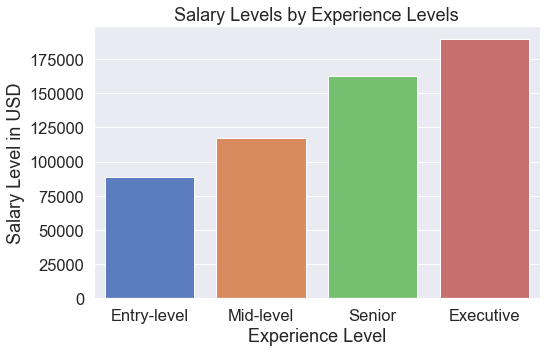

In [171]:
exp_df = df.groupby(['experience_level']).salary_in_usd.mean().reset_index()

exp_df = exp_df.sort_values(by='salary_in_usd')

fig = plt.figure(figsize=(8,5))
ax = sns.barplot(x="experience_level", y="salary_in_usd", data=exp_df,\
                palette= sns.color_palette("muted", n_colors=len(exp_df)),\
                hue="experience_level")
ax.set(title='Salary Levels by Experience Levels', xlabel="Experience Level", \
       ylabel="Salary Level in USD")
sns.set(font_scale=1.35, palette="dark")
plt.show()

**Now include the countries of United States and United Kingdom only.**

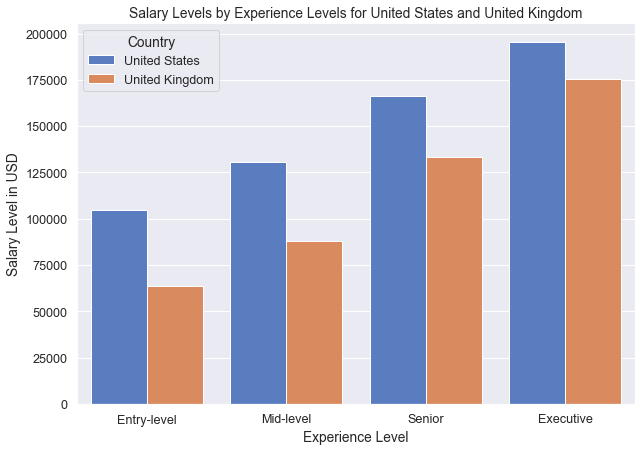

In [173]:
#groupby experience level and employee residence
exp_df = df.groupby(['experience_level', 'employee_residence']).salary_in_usd.mean().reset_index()

#convert to a pivot table
exp_df_pivot = exp_df.pivot(columns= 'employee_residence',\
                            index='experience_level', values='salary_in_usd')

#grab only the two countries of interest
exp_df_us_uk = exp_df_pivot[['United States', 'United Kingdom']].reset_index()

#sort values int ascending order
exp_df_us_uk = exp_df_us_uk.sort_values(by='United Kingdom')

# convert to long (tidy) form
dfm = exp_df_us_uk.melt('experience_level', var_name='Country', value_name='vals')

#plot figure
fig = plt.figure(figsize=(10,7))
                 
ax = sns.barplot(x="experience_level", y="vals", hue="Country", data=dfm)
                 
ax.set(title='Salary Levels by Experience Levels for United States and United Kingdom',\
      xlabel="Experience Level", \
       ylabel="Salary Level in USD")
                 
sns.set(font_scale=1.1, palette="muted")
                 
plt.show()

Inference: across all levels (entry-level to executive), salaries are greater in the US than in the UK.

**Average salary by year.**

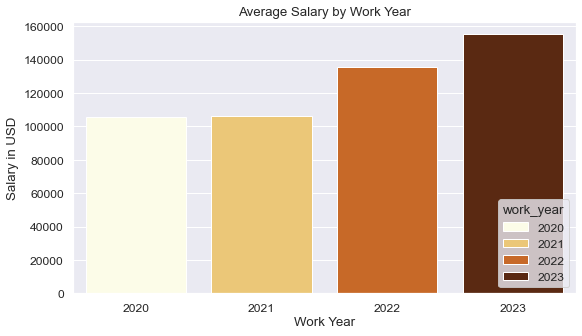

In [181]:
df_year = df.groupby(['work_year']).salary_in_usd.mean().reset_index()

fig = plt.figure(figsize=(9,5))
ax = sns.barplot(x="work_year", y="salary_in_usd", \
                data=df_year, hue= "work_year",
                 palette="YlOrBr"
                )

ax.set(xlabel="Work Year", ylabel="Salary in USD", title="Average Salary by Work Year",\
            )
sns.move_legend(ax, 'lower right')

plt.show()

**Get frequency of job titles.**

<Figure size 792x576 with 0 Axes>

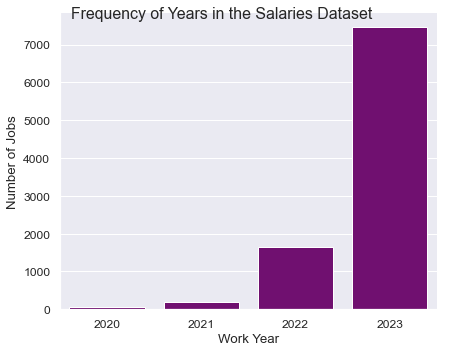

In [183]:
#plot the number of jobs per work year
fig = plt.figure(figsize=(11,8))
ax = sns.catplot(x="work_year", kind="count", data=df,\
                color="purple", height = 5, aspect = 1.25
                )
ax.fig.suptitle("Frequency of Years in the Salaries Dataset")
ax.set(xlabel = "Work Year", ylabel="Number of Jobs", )
plt.show()

**Distribution of Job Categories by Work Setting.**

In [130]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [6]:
#group by work setting
work_set = df.groupby(['job_category', 'work_setting']).work_year.count().reset_index()

work_set

,job_category,work_setting,work_year
0,BI and Visualization,Hybrid,1
1,BI and Visualization,In-person,226
2,BI and Visualization,Remote,86
3,Cloud and Database,Remote,5
4,Data Analysis,Hybrid,29
5,Data Analysis,In-person,794
6,Data Analysis,Remote,634
7,Data Architecture and Modeling,Hybrid,2
8,Data Architecture and Modeling,In-person,124
9,Data Architecture and Modeling,Remote,133


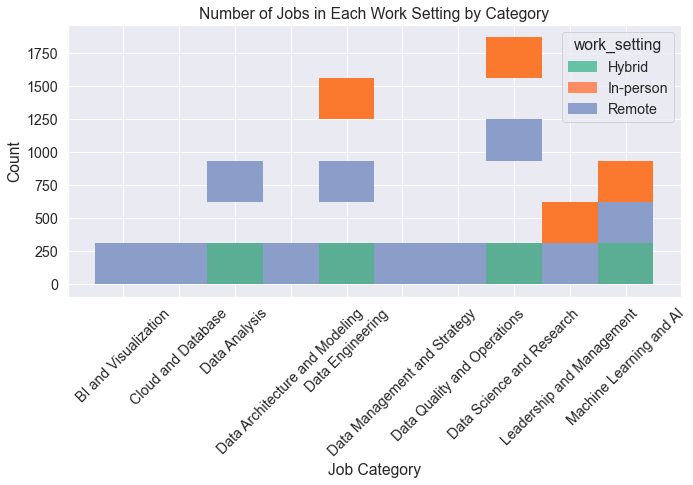

In [186]:
#plot the figure
fig = plt.figure(figsize=(11,5))
ax = sns.histplot(data=work_set, x="job_category", y="work_year",\
             hue="work_setting", multiple="stack",\
                 palette = "Set2")

ax.set(xlabel="Job Category", ylabel="Count", title="Number of Jobs in Each Work Setting by Category"\
      )
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
ax.tick_params(axis='x', labelrotation=45)
plt.show()

Inference: a majority of job categories are remote-based positions.  The most frequent type of "in-person" roles are Data Architecture & Modeling, and Data Quality & Operations.  Also, some job categories allow for a "hybrid" position: Data Analysis, Data Engineering, Data Science & Research, and Machine Learning & AI.

### **Frequency of Job Titles.**

In [7]:
#group data by job title and count the number of salaries
jobs = df.groupby(["job_title"]).salary.count().reset_index()
sorted_df = jobs.sort_values(by="salary")

sorted_df

,job_title,salary
124,Staff Machine Learning Engineer,1
68,Data Science Tech Lead,1
100,Machine Learning Operations Engineer,1
34,Consultant Data Engineer,1
106,Manager Data Management,1
...,...,...
12,Applied Scientist,272
96,Machine Learning Engineer,991
35,Data Analyst,1388
69,Data Scientist,1989


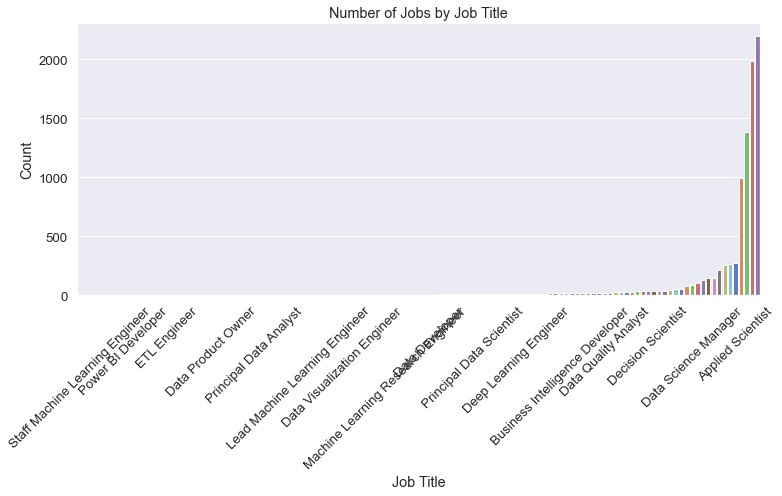

In [8]:
#plot the frequencies of all job titles across dataset
sns.set_style('darkgrid')
plt.figure(figsize=(11,7))
ax = sns.barplot(data = sorted_df, x="job_title", y = "salary",\
                 hue="job_title",
                palette= sns.color_palette("muted", n_colors=len(sorted_df))\
                )
ax.set(xlabel="Job Title", ylabel="Count", title="Number of Jobs by Job Title")
ax.tick_params(axis='x', labelrotation=45)
plt.xticks(sorted_df['job_title'][::8])
plt.tight_layout()
plt.show()

Inference: The most common type of job titles in the dataset include: Data Scientist, Applied Scientist, Data Science Manager, Decision Scientist.  Note: the figure above is set to display every eigth entry on the x-axis.

**Select the top most frequently occuring Job Titles.**

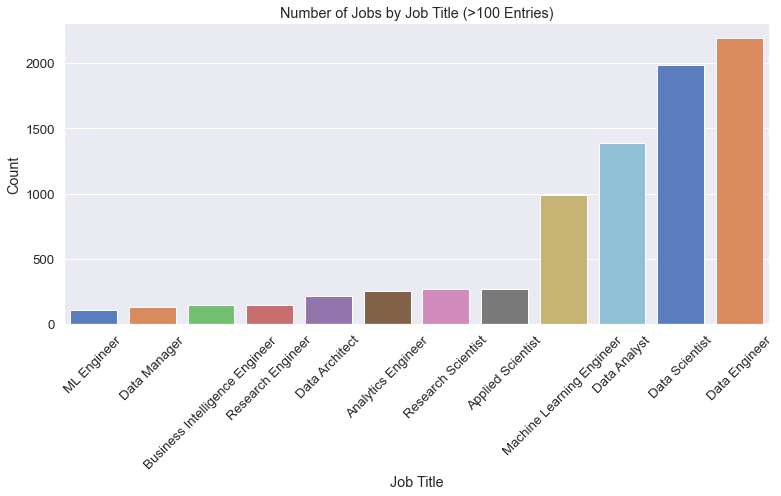

In [9]:
#filter the grouped dataset by job titles occuring more than 100 times
sorted_df_top = sorted_df[sorted_df["salary"] > 100]

#plot the frequencies of only job titles occuring more than 100x
sns.set_style('darkgrid')
plt.figure(figsize=(11,7))
ax = sns.barplot(data = sorted_df_top, x="job_title", y = "salary",\
                 hue="job_title",
                palette= sns.color_palette("muted", n_colors=len(sorted_df_top))\
                )
ax.set(xlabel="Job Title", ylabel="Count", title="Number of Jobs by Job Title (>100 Entries)")
ax.tick_params(axis='x', labelrotation=45)
#plt.xticks(sorted_df['job_title'][::3])
plt.tight_layout()
plt.show()

Inference: The most frequently occuring Job Titles include Data Engineer, Data Scientist, Data Analyst, Machine Learning Engineer, Applied Scientist, Research Scientist, Analytics Engineer, Data Architect, etc.  Note: the entries are more specific when the other data are filtered out.

**Now include salary data along with the Job Title ranking information.**

In [10]:
sorted_df.columns = ['job_title', 'count']
sorted_df

,job_title,count
124,Staff Machine Learning Engineer,1
68,Data Science Tech Lead,1
100,Machine Learning Operations Engineer,1
34,Consultant Data Engineer,1
106,Manager Data Management,1
...,...,...
12,Applied Scientist,272
96,Machine Learning Engineer,991
35,Data Analyst,1388
69,Data Scientist,1989


In [11]:
#create new dataframe to include the salaries of each job title
job_salary = df.groupby(['job_title']).salary_in_usd.mean().reset_index()
job_salary

,job_title,salary_in_usd
0,AI Architect,250328.000000
1,AI Developer,141140.888889
2,AI Engineer,171663.972222
3,AI Programmer,68817.400000
4,AI Research Engineer,73271.500000
...,...,...
120,Sales Data Analyst,60000.000000
121,Software Data Engineer,111627.666667
122,Staff Data Analyst,79917.000000
123,Staff Data Scientist,134500.000000


**Merge the salaries and job-title frequency dataframes.**

In [12]:
merged_df = sorted_df.merge(job_salary, on=['job_title'], \
                            how='inner')
merged_df

,job_title,count,salary_in_usd
0,Staff Machine Learning Engineer,1,185000.000000
1,Data Science Tech Lead,1,375000.000000
2,Machine Learning Operations Engineer,1,60000.000000
3,Consultant Data Engineer,1,118539.000000
4,Manager Data Management,1,125000.000000
...,...,...,...
120,Applied Scientist,272,190171.606618
121,Machine Learning Engineer,991,184785.883956
122,Data Analyst,1388,109911.472622
123,Data Scientist,1989,156681.015083


**Select the salaries from the most and least frequently occuring job titles.**

In [13]:
#select the top and bottom 5% of most frequently occuring job titles
p0 = 0.95
p1 = 0.05

#designate the limits based upon the above percentiles
upper_limit = merged_df['count'].quantile(p0)
lower_limit = merged_df['count'].quantile(p1)

#filter dataset by percentile rankings
top_bottom = merged_df.loc[((merged_df["count"] >= upper_limit) | \
                            (merged_df["count"] <= lower_limit))]
top_bottom

,job_title,count,salary_in_usd
0,Staff Machine Learning Engineer,1,185000.000000
1,Data Science Tech Lead,1,375000.000000
2,Machine Learning Operations Engineer,1,60000.000000
3,Consultant Data Engineer,1,118539.000000
4,Manager Data Management,1,125000.000000
5,Cloud Data Architect,1,250000.000000
6,Managing Director Data Science,1,300000.000000
7,Marketing Data Engineer,1,66970.000000
8,Power BI Developer,1,64781.000000
9,BI Data Engineer,1,60000.000000


In [11]:
#plot the figure
sns.set_style('darkgrid')
sns.set(font_scale=1.2)
fig = plt.figure(figsize=(13,9))

#sort the dataset by salary size
top_bottom = top_bottom.sort_values(by="salary_in_usd")

ax = sns.scatterplot(x= "job_title", y="salary_in_usd", data=top_bottom,
                  hue="count", s=100,\
                   palette= sns.color_palette("muted", n_colors=len(top_bottom)) )

ax.set(xlabel="Job Title", ylabel="Salary in USD", title=\
       "Salaries by Most and Least Frequent Job Titles")
sns.set(font_scale=1.25)

ax.tick_params(axis='x', labelrotation=45, which='major', direction="out", length=16)
plt.rcParams['xtick.bottom'] = True
plt.tight_layout()
plt.show()

NameError: name 'top_bottom' is not defined

<Figure size 936x648 with 0 Axes>

Inference: Some of the most and least lucrative job titles are unique in respect to other, similiar data-related positions (e.g., Analytics Engineering Manager, Data Science Tech Lead, Managing Director of Data Science, as well as Power BI Developer, BI Data Engineer, Sales Data Analyst, etc., respectively); and the most commonly found job titles are not necessarily the highest paying (e.g., Research Scientist, Data Scientist, Machine Learning Engineer, etc.). 

**Find average salaries by job category.**

In [188]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [57]:
work_set = df.groupby(['job_category', 'work_setting']).salary_in_usd.mean().reset_index()

work_set

,job_category,work_setting,salary_in_usd
0,BI and Visualization,Hybrid,76000.000000
1,BI and Visualization,In-person,138706.761062
2,BI and Visualization,Remote,126280.232558
3,Cloud and Database,Remote,155000.000000
4,Data Analysis,Hybrid,62444.896552
5,Data Analysis,In-person,110291.003778
6,Data Analysis,Remote,108376.777603
7,Data Architecture and Modeling,Hybrid,174851.500000
8,Data Architecture and Modeling,In-person,139954.758065
9,Data Architecture and Modeling,Remote,170680.586466


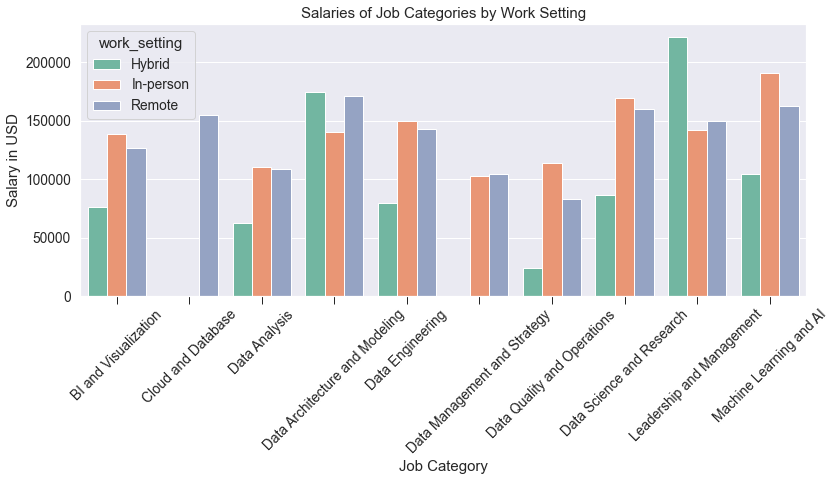

In [260]:
from matplotlib.ticker import FixedLocator, MaxNLocator

fig = plt.figure(figsize=(13,6))
ax = sns.barplot(data = work_set, x="job_category", y="salary_in_usd",\
                  hue="work_setting", 
                 palette = "Set2")

ax.set(xlabel="Job Category", ylabel="Salary in USD", \
        title="Salaries of Job Categories by Work Setting",\
      )


#xlabels = ax.get_xticklabels()

# Customize x-axis ticks and labels
#ositions = np.arange(len(work_set['job_category']))  # Set tick positions
#ax.set_xticks(positions)  # Use FixedLocator
#ax.set_xticklabels(work_set["job_category"])  # Use FixedFormatter

ax.tick_params(axis='x', labelrotation=45, which = 'major', direction='out',\
              length=8, width=1,)
plt.rcParams['xtick.bottom'] = True
plt.xticks()
plt.show()

Inference: the job categories with the highest salaries across work setting are the Data Architecture & Modeling, and Leadership & Management types.  Also, most job categories have an almost even number of "in person" and "remote" positions, but "hybrid" positions vary across job categories. 

**Average salary in USD based on currency type.**

In [245]:
money_df = df.groupby(['salary_currency', 'employment_type']).salary_in_usd.mean().reset_index()
money_df = money_df.sort_values(by="salary_in_usd")
money_df

,salary_currency,employment_type,salary_in_usd
12,PLN,Part-time,18160.000000
14,TRY,Full-time,22189.333333
6,DKK,Part-time,23841.000000
1,BRL,Full-time,26168.750000
9,EUR,Part-time,37025.000000
11,PLN,Full-time,39089.333333
5,DKK,Full-time,45896.000000
16,USD,Freelance,53868.636364
8,EUR,Full-time,63355.015060
0,AUD,Full-time,78538.181818


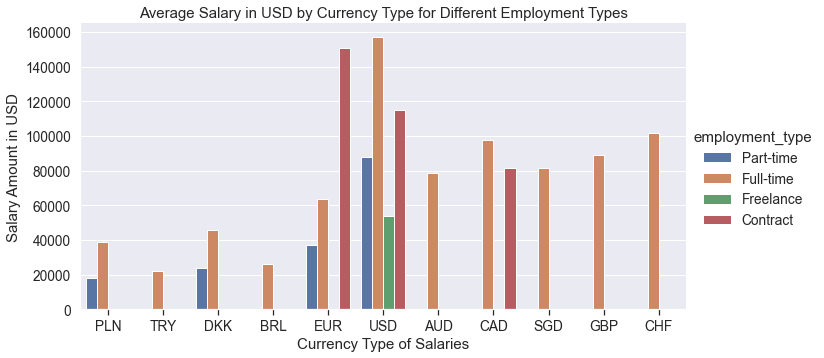

In [272]:
#plot the figure
#fig = plt.figure(figsize=(11,6))
ax = sns.catplot(data=money_df, x="salary_currency", y="salary_in_usd", \
                 hue="employment_type", kind="bar",\
                 height=5, aspect=2)
ax.set(xlabel="Currency Type of Salaries", ylabel="Salary Amount in USD", \
      title="Average Salary in USD by Currency Type for Different Employment Types") 

#ax.tick_params(direction='out')
plt.rcParams['xtick.bottom'] = True
plt.show()

Inference: Jobs that are presumably available in the US include all employment types (e.g., part-time, full-time, freelance, and contract), but full-time positions pay the most (and more than jobs in other countries).  Also, jobs in Europe don't include freelance positions apparently.

**Find average salary based on employee residence and company location.**

In [26]:
hq_loc = df.groupby(['employee_residence', 'company_location']).salary_in_usd.mean().reset_index()

hq_loc

,employee_residence,company_location,salary_in_usd
0,Algeria,Algeria,100000.000000
1,American Samoa,Bahamas,45555.000000
2,Andorra,Andorra,50745.000000
3,Argentina,Argentina,62000.000000
4,Argentina,Mexico,60000.000000
...,...,...,...
150,United States,United States,158598.940223
151,Uzbekistan,Russia,106000.000000
152,Uzbekistan,United States,70000.000000
153,Vietnam,United Kingdom,50000.000000


In [27]:
#filter the dataset to include only jobs with most and least paying salaries
p0 = 0.95
p1 = 0.05

#designate the limits based upon the above percentiles
upper_limit = hq_loc['salary_in_usd'].quantile(p0)
lower_limit = hq_loc['salary_in_usd'].quantile(p1)

#filter dataset by percentile rankings
most_least = hq_loc.loc[((hq_loc["salary_in_usd"] >= upper_limit) | \
                            (hq_loc["salary_in_usd"] <= lower_limit))]

most_least = most_least.sort_values(by="salary_in_usd")
most_least

,employee_residence,company_location,salary_in_usd
92,Nigeria,Canada,15000.000000
132,Thailand,Thailand,15000.000000
63,Indonesia,Indonesia,15000.000000
35,Ecuador,Ecuador,16000.000000
7,Armenia,Russia,17000.000000
86,Moldova,Moldova,18000.000000
104,Poland,India,18160.000000
94,Nigeria,United States,20000.000000
98,Pakistan,Pakistan,20000.000000
27,Costa Rica,United States,20000.000000


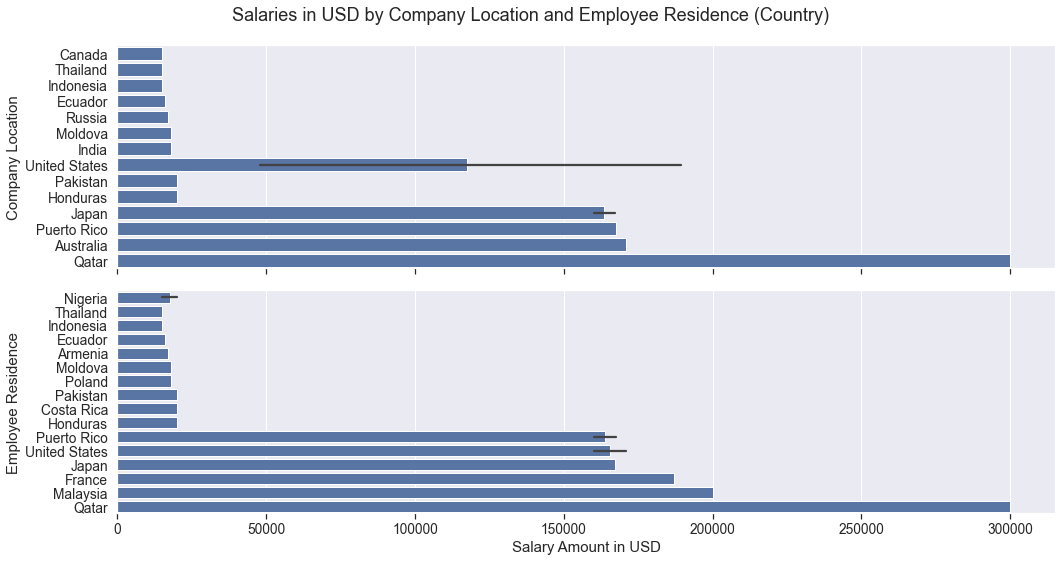

In [70]:
#create subsplots
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (15, 8))

#plot the first subplot
sns.barplot(data=most_least, x="salary_in_usd", y="company_location", \
                ax = ax1,
                 orient="h",\
             #    height=5, aspect=2, kind="bar"
                    )

ax[0].set(xlabel="Salary Amount in USD", ylabel="Company Location", \
          )
    #title="Average Salary in USD by Company Location for Different Employee Residences") 

#plot the second subplot
sns.barplot(data=most_least, x="salary_in_usd", y="employee_residence", \
            ax = ax2,
                   orient="h",\
            #        height=5, aspect=2,  kind="bar",
                    )
ax1.set(ylabel="Company Location")
ax2.set(ylabel="Employee Residence")
plt.xlabel("Salary Amount in USD")
#plt.ylabel("common Y")
#ax.tick_params(direction='out')
fig.suptitle('Salaries in USD by Company Location and Employee Residence (Country)')
plt.rcParams['xtick.bottom'] = True
plt.tight_layout()
plt.show()

Inference: Employees often work remotely for companies that are located in a different country from their residence.  The United States has a lot of varying salary amounts for jobs in this category, evidenced by the large error bars in the first graph.  There are likely a lot of employees from other countries working for US-based companies too.

In [8]:
firm_size = df.groupby(['company_size', 'work_setting', 'employment_type']).salary_in_usd.mean().reset_index()
firm_size.head()

,company_size,work_setting,employment_type,salary_in_usd
0,L,Hybrid,Contract,44753.000000
1,L,Hybrid,Full-time,98659.339450
2,L,Hybrid,Part-time,35803.000000
3,L,In-person,Freelance,20000.000000
4,L,In-person,Full-time,164603.275325


Text(0.5, 0.98, 'Salaries in USD by Company Location and Employee Residence (Country)')

<Figure size 1008x720 with 0 Axes>

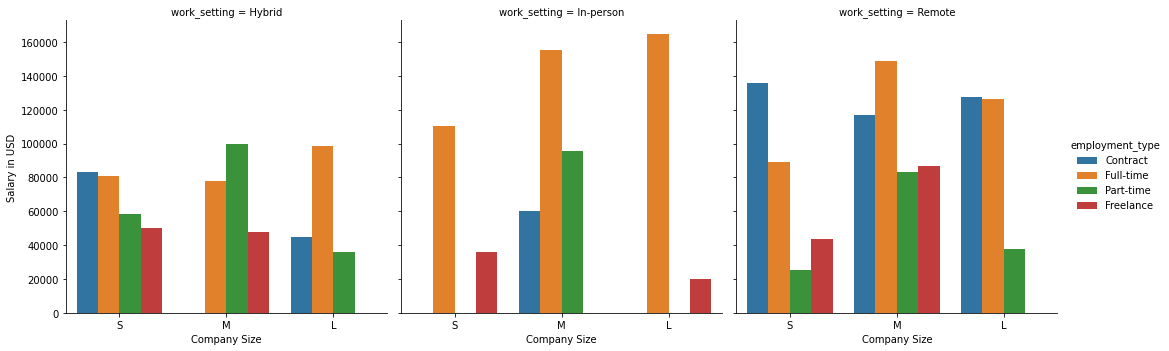

In [45]:
fig = plt.figure(figsize=(14,10))
#plot the figure
ax = sns.catplot(data=firm_size, x= "company_size", y="salary_in_usd", \
                hue = "employment_type", kind = "bar", \
                 order = ["S", "M", "L"],\
                col = "work_setting", #height=12, #aspect=1.5)
                )
ax.set(xlabel="Company Size", ylabel="Salary in USD")
fig.suptitle('Salaries in USD by Company Location and Employee Residence (Country)')


Inference: The biggest salaries in the dataset belong to full-time employees of medium- and large-sized companies; particularly in an "in-person" work environment.

**Error with Plotly express.**

In [14]:
import plotly.io as pio
pio.renderers.default='notebook'

In [9]:
conda install -c anaconda plotly

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-5.9.0               |   py38haa95532_0         9.1 MB  anaconda
    tenacity-8.2.2             |   py38haa95532_0          36 KB  anaconda
    ------------------------------------------------------------
                                           Total:         9.2 MB

The following NEW packages will be INSTALLED:

  plotly             anaconda/win-64::plotly-5.9.0-py38haa95532_0
  tenacity           anaconda/win-64::tenacity-8.2.2-py38haa95532_0




plotly-5.9.0         | 9.1 MB    |            |   0% 
plotly-5.9.0         | 9.1 MB    |            |   0% 
plotly-5.9.0         | 9.1 MB    | #5         |  15% 
plotly-5.9.0         | 9.1 MB    | #####1     |  51% 
plotly-5.9.0         | 9



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda




In [12]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tenacity-8.2.2             |   py38haa95532_0          37 KB
    ------------------------------------------------------------
                                           Total:          37 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  tenacity                                         anaconda --> pkgs/main




tenacity-8.2.2       | 37 KB     |            |   0% 
Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda





tenacity-8.2.2       | 37 KB     | ########5  |  86% 
tenacity-8.2.2       | 37 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [13]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plotly.offline.init_notebook_mode(connected=True)
# Initialize Plotly for offline mode
init_notebook_mode(connected=True)

In [14]:
plotly.offline.init_notebook_mode(connected=True)

NameError: name 'plotly' is not defined

In [46]:
pip install "jupyterlab>=3" "ipywidgets>=7.6" --user

  Using cached jupyterlab-4.1.2-py3-none-any.whl (11.4 MB)
  Using cached importlib_metadata-7.0.1-py3-none-any.whl (23 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl (133 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl (13 kB)
  Using cached async_lru-2.0.4-py3-none-any.whl (6.1 kB)
  Using cached jupyterlab_server-2.25.3-py3-none-any.whl (58 kB)
  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
  Using cached httpx-0.26.0-py3-none-any.whl (75 kB)
  Using cached jupyter_lsp-2.2.2-py3-none-any.whl (68 kB)
  Using cached jupyter_server-2.12.5-py3-none-any.whl (380 kB)
  Using cached MarkupSafe-2.1.5-cp38-cp38-win_amd64.whl (17 kB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl (32 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached jsonschema-4.21.1-py3-none-any.whl (85 kB)
  Using cached Babel-2.14.0-py3-none-any.whl (11.0 MB)
  Using cached sniffio-1.3.0-py3-none-any.whl (10 kB)
  Using cached httpcore-1.0.3-py3-none-any.whl (77 kB)
  Using 

ERROR: spyder 4.1.4 requires pyqt5<5.13; python_version >= "3", which is not installed.
ERROR: spyder 4.1.4 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
ERROR: nbformat 5.9.2 has requirement traitlets>=5.1, but you'll have traitlets 4.3.3 which is incompatible.
ERROR: nbconvert 7.16.1 has requirement jupyter-core>=4.7, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: nbconvert 7.16.1 has requirement traitlets>=5.1, but you'll have traitlets 4.3.3 which is incompatible.
ERROR: jupyterlab-server 2.25.3 has requirement packaging>=21.3, but you'll have packaging 20.4 which is incompatible.
ERROR: jupyter-server-terminals 0.5.2 has requirement pywinpty>=2.0.3; os_name == "nt", but you'll have pywinpty 0.5.7 which is incompatible.
ERROR: nbclient 0.9.0 has requirement jupyter-client>=6.1.12, but you'll have jupyter-client 6.1.6 which is incompatible.
ERROR: nbclient 0.9.0 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4


  Using cached tinycss2-1.2.1-py3-none-any.whl (21 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl (15 kB)
  Using cached nbclient-0.9.0-py3-none-any.whl (24 kB)
  Using cached mistune-3.0.2-py3-none-any.whl (47 kB)
  Using cached argon2_cffi_bindings-21.2.0-cp36-abi3-win_amd64.whl (30 kB)
  Using cached rfc3986_validator-0.1.1-py2.py3-none-any.whl (4.2 kB)
  Using cached python_json_logger-2.0.7-py3-none-any.whl (8.1 kB)
  Using cached rfc3339_validator-0.1.4-py2.py3-none-any.whl (3.5 kB)
  Using cached fastjsonschema-2.19.1-py3-none-any.whl (23 kB)


In [14]:
plotly.offline.iplot

<function plotly.offline.offline.iplot(figure_or_data, show_link=False, link_text='Export to plot.ly', validate=True, image=None, filename='plot_image', image_width=800, image_height=600, config=None, auto_play=True, animation_opts=None)>